1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
CoT pickle created: ./data/cot_1990_2023.pickle
GASOLINE BLENDSTOCK (RBOB) - NEW YORK MERCANTILE EXCHANGE 111659
GASOLINE BLENDSTOCK (RBOB) - NEW YORK MERCANTILE EXCHANGE  111659 
GASOLINE CRK-RBOB/BRENT 1st - ICE FUTURES ENERGY DIV 111415
GASOLINE RBOB - NEW YORK MERCANTILE EXCHANGE 111659
MT BELV NAT GASOLINE 5 DEC SWP - NEW YORK MERCANTILE EXCHANGE  06665R 
MT BELV NAT GASOLINE OPIS - NEW YORK MERCANTILE EXCHANGE 06665R
MT BELV NAT GASOLINE OPIS SWAP - NEW YORK MERCANTILE EXCHANGE 06665R
MT BELV NAT GASOLINE OPIS SWAP - NEW YORK MERCANTILE EXCHANGE  06665R 
MT BELVIEU NAT GASOLINE SWAP - NEW YORK MERCANTILE EXCHANGE  066654 
RBOB GASOLINE 1ST LINE - ICE FUTURES ENERGY DIV 111416
RBOB GASOLINE FINANCIAL - NEW YORK MERCANTILE EXCHANGE  11165J 
RBOB GASOLINE/BRENT CRACK SPRD - NEW YORK MERCANTILE EXCHANGE 111A41
R

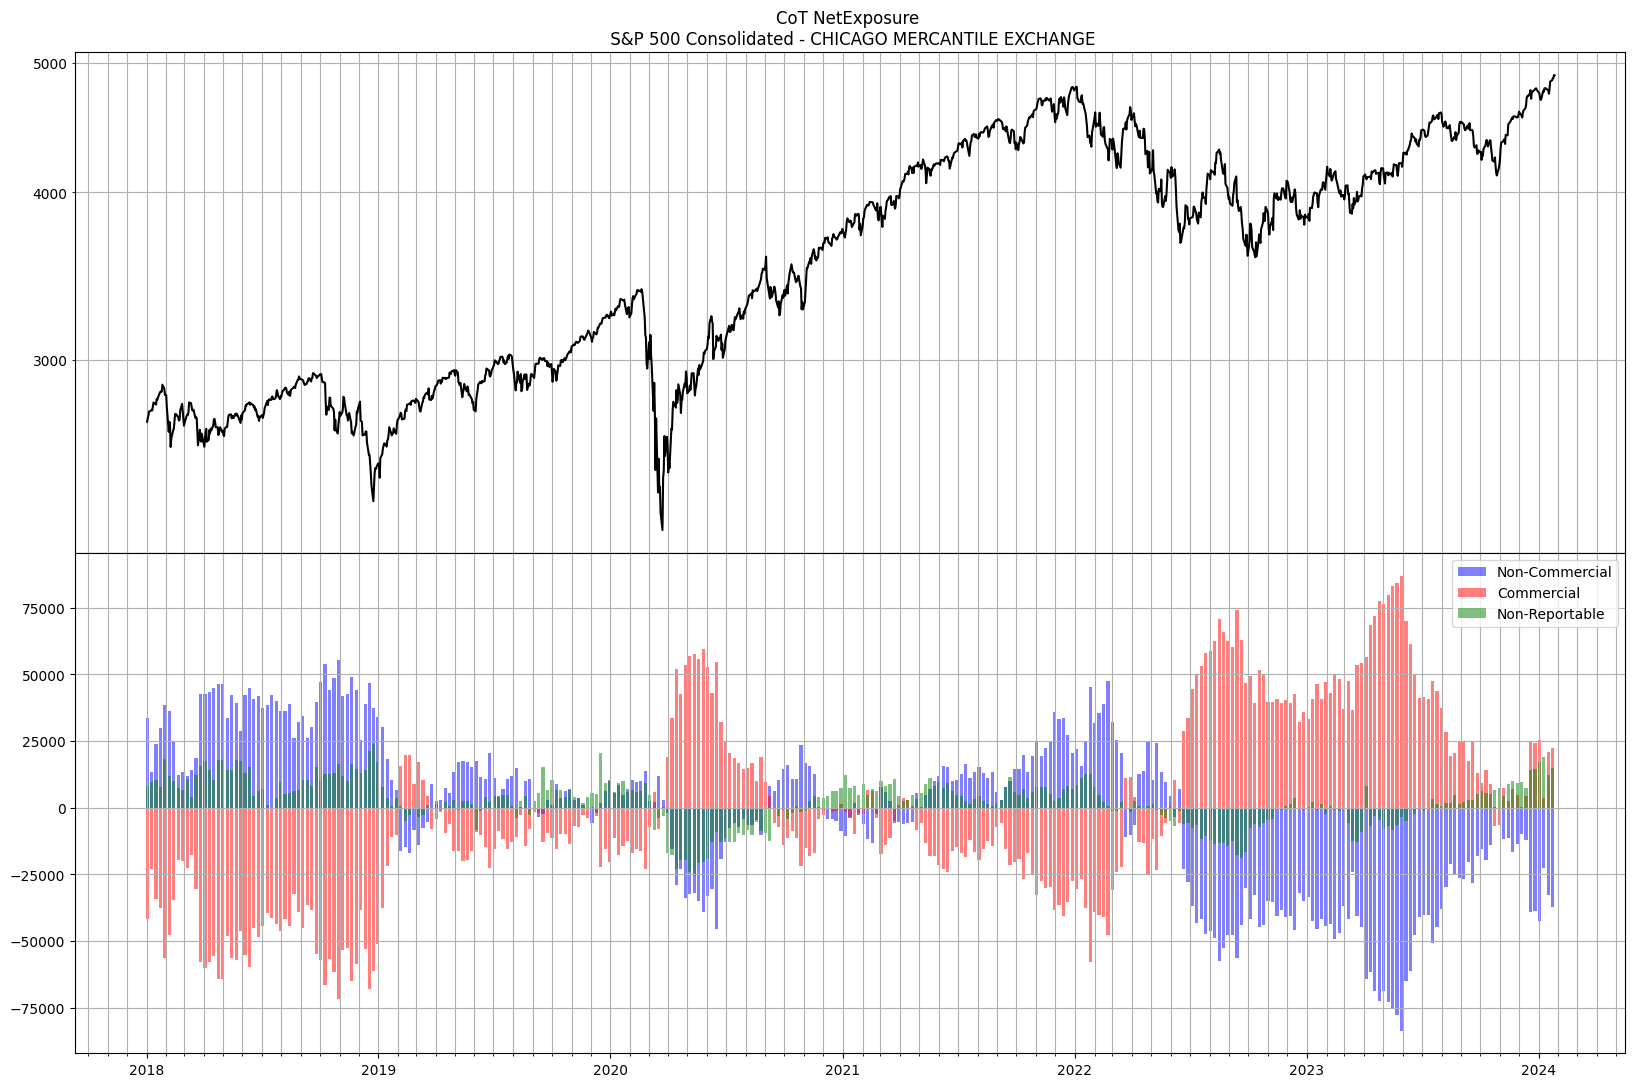

In [6]:
import yfinance as yf
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dataclasses import dataclass
import numpy as np
# pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

@dataclass
class CotMetaData:
    abbrev: str
    market_code: list[str]
    cot_name: str
    yfinance_ticker: list[str]

# modifying figsize for bigger plot
# I run a big monitor, modify to your preference.
plt.rcParams["figure.figsize"] = [20, 13]

# constants
EXPORT_PATH = "./data/"
START_YEAR = 1990
COT_FILE_PATH = f"{EXPORT_PATH}cot_{START_YEAR}_2023.pickle"

DTYPES = {"Market and Exchange Names": str, "As of Date in Form YYMMDD": str, "As of Date in Form YYYY-MM-DD": str, "CFTC Contract Market Code": str, "CFTC Market Code in Initials": str,
          "CFTC Region Code": str, "CFTC Commodity Code": str, "Open Interest (All)": "Int64", "Noncommercial Positions-Long (All)":"Int64","Noncommercial Positions-Short (All)":"Int64","Noncommercial Positions-Spreading (All)":"Int64",
          "Commercial Positions-Long (All)": "Int64","Commercial Positions-Short (All)": "Int64"," Total Reportable Positions-Long (All)":"Int64","Total Reportable Positions-Short (All)":"Int64","Nonreportable Positions-Long (All)":"Int64",
          "Nonreportable Positions-Short (All)": "Int64","Open Interest (Old)": "Int64","Noncommercial Positions-Long (Old)": "Int64","Noncommercial Positions-Short (Old)": "Int64","Noncommercial Positions-Spreading (Old)": "Int64",
          "Commercial Positions-Long (Old)": "Int64","Commercial Positions-Short (Old)": "Int64","Total Reportable Positions-Long (Old)": "Int64", "Total Reportable Positions-Short (Old)": "Int64","Nonreportable Positions-Long (Old)": "Int64",
          "Nonreportable Positions-Short (Old)": "Int64","Open Interest (Other)":"Int64","Noncommercial Positions-Long (Other)":"Int64","Noncommercial Positions-Short (Other)":"Int64", "Noncommercial Positions-Spreading (Other)":"Int64",
          "Commercial Positions-Long (Other)":"Int64","Commercial Positions-Short (Other)":"Int64","Total Reportable Positions-Long (Other)":"Int64","Total Reportable Positions-Short (Other)":"Int64","Nonreportable Positions-Long (Other)":"Int64",
          "Nonreportable Positions-Short (Other)":"Int64","Change in Open Interest (All)":str, "Change in Noncommercial-Long (All)":str, "Change in Noncommercial-Short (All)": str,"Change in Noncommercial-Spreading (All)": str,
          "Change in Commercial-Long (All)":"Int64", "Change in Commercial-Short (All)":"Int64","Change in Total Reportable-Long (All)":"Int64","Change in Total Reportable-Short (All)":"Int64","Change in Nonreportable-Long (All)":"Int64",
          "Change in Nonreportable-Short (All)":str, "% of Open Interest (OI) (All)":"Float64","% of OI-Noncommercial-Long (All)":"Float64","% of OI-Noncommercial-Short (All)":"Float64","% of OI-Noncommercial-Spreading (All)":"Float64",
          "% of OI-Commercial-Long (All)":"Float64","% of OI-Commercial-Short (All)":"Float64","% of OI-Total Reportable-Long (All)":"Float64","% of OI-Total Reportable-Short (All)":"Float64","% of OI-Nonreportable-Long (All)":"Float64",
          "% of OI-Nonreportable-Short (All)":"Float64","% of Open Interest (OI)(Old)":"Float64","% of OI-Noncommercial-Long (Old)":"Float64","% of OI-Noncommercial-Short (Old)":"Float64","% of OI-Noncommercial-Spreading (Old)":"Float64",
          "% of OI-Commercial-Long (Old)":"Float64","% of OI-Commercial-Short (Old)":"Float64","% of OI-Total Reportable-Long (Old)":"Float64","% of OI-Total Reportable-Short (Old)":"Float64","% of OI-Nonreportable-Long (Old)":"Float64",
          "% of OI-Nonreportable-Short (Old)":"Float64","% of Open Interest (OI) (Other)":"Float64","% of OI-Noncommercial-Long (Other)":"Float64","% of OI-Noncommercial-Short (Other)":"Float64","% of OI-Noncommercial-Spreading (Other)":"Float64",
          "% of OI-Commercial-Long (Other)":"Float64","% of OI-Commercial-Short (Other)":"Float64","% of OI-Total Reportable-Long (Other)":"Float64","% of OI-Total Reportable-Short (Other)":"Float64","% of OI-Nonreportable-Long (Other)":"Float64",
          "% of OI-Nonreportable-Short (Other)":"Float64","Traders-Total (All)":"Int64","Traders-Noncommercial-Long (All)":"Int64","Traders-Noncommercial-Short (All)":"Int64","Traders-Noncommercial-Spreading (All)":"Int64",
          "Traders-Commercial-Long (All)":"Int64","Traders-Commercial-Short (All)":"Int64","Traders-Total Reportable-Long (All)":"Int64","Traders-Total Reportable-Short (All)":"Int64","Traders-Total (Old)":"Int64",
          "Traders-Noncommercial-Long (Old)":"Int64","Traders-Noncommercial-Short (Old)":"Int64","Traders-Noncommercial-Spreading (Old)":"Int64","Traders-Commercial-Long (Old)":"Int64","Traders-Commercial-Short (Old)":"Int64","Traders-Total Reportable-Long (Old)":"Int64",
          "Traders-Total Reportable-Short (Old)":"Int64","Traders-Total (Other)":"Int64","Traders-Noncommercial-Long (Other)":"Int64","Traders-Noncommercial-Short (Other)":"Int64","Traders-Noncommercial-Spreading (Other)":"Int64","Traders-Commercial-Long (Other)":"Int64",
          "Traders-Commercial-Short (Other)":"Int64","Traders-Total Reportable-Long (Other)":"Int64","Traders-Total Reportable-Short (Other)":"Int64","Concentration-Gross LT = 4 TDR-Long (All)":"Float64","Concentration-Gross LT =4 TDR-Short (All)":"Float64",
          "Concentration-Gross LT =8 TDR-Long (All)":"Float64","Concentration-Gross LT =8 TDR-Short (All)":"Float64","Concentration-Net LT =4 TDR-Long (All)":"Float64","Concentration-Net LT =4 TDR-Short (All)":"Float64","Concentration-Net LT =8 TDR-Long (All)":"Float64",
          "Concentration-Net LT =8 TDR-Short (All)":"Float64","Concentration-Gross LT =4 TDR-Long (Old)":"Float64","Concentration-Gross LT =4 TDR-Short (Old)":"Float64","Concentration-Gross LT =8 TDR-Long (Old)":"Float64","Concentration-Gross LT =8 TDR-Short (Old)":"Float64",
          "Concentration-Net LT =4 TDR-Long (Old)":"Float64","Concentration-Net LT =4 TDR-Short (Old)":"Float64","Concentration-Net LT =8 TDR-Long (Old)":"Float64","Concentration-Net LT =8 TDR-Short (Old)":"Float64","Concentration-Gross LT =4 TDR-Long (Other)":"Float64",
          "Concentration-Gross LT =4 TDR-Short(Other)":"Float64","Concentration-Gross LT =8 TDR-Long (Other)":"Float64","Concentration-Gross LT =8 TDR-Short(Other)":"Float64", "Concentration-Net LT =4 TDR-Long (Other)":"Float64","Concentration-Net LT =4 TDR-Short (Other)":"Float64",
          "Concentration-Net LT =8 TDR-Long (Other)":"Float64","Concentration-Net LT =8 TDR-Short (Other)":"Float64", "Contract Units":str,"CFTC Contract Market Code (Quotes)":str,"CFTC Market Code in Initials (Quotes)":str,"CFTC Commodity Code (Quotes)":str}

# cot metas
COT_DATA = list()
COT_DATA.append(CotMetaData("spx_all", ["13874+","138741", "13874A"], "S&P 500 All Contracts", ["^GSPC"]))
COT_DATA.append(CotMetaData("spx", ["13874+"], "S&P 500 Consolidated - CHICAGO MERCANTILE EXCHANGE", ["^GSPC"]))
COT_DATA.append(CotMetaData("spx_mini", ["13874A"], "E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE", ["^GSPC"]))
# COT_DATA.append(CotMetaData("nasdaq", ["20974+", "209747", "209742", "209741"], "NASDAQ-100 Consolidated - CHICAGO MERCANTILE EXCHANGE", ["^NDX"]))
COT_DATA.append(CotMetaData("nasdaq", ["20974+"], "NASDAQ-100 Consolidated - CHICAGO MERCANTILE EXCHANGE", ["^NDX"]))

COT_DATA.append(CotMetaData("gold", ["088691"], "GOLD - COMMODITY EXCHANGE INC.", ["GC=F"]))
COT_DATA.append(CotMetaData("silver", ["084691"], "SILVER - COMMODITY EXCHANGE INC.", ["SI=F"]))
COT_DATA.append(CotMetaData("crude", ["06765T"],  "BRENT CRUDE OIL LAST DAY - NEW YORK MERCANTILE EXCHANGE", ["CL=F"]))
COT_DATA.append(CotMetaData("heating", ["022651"],  "HEATING OIL, NY HARBOR-ULSD - NEW YORK MERCANTILE EXCHANGE", ["CL=F"]))
COT_DATA.append(CotMetaData("btc", ["133741"], "BITCOIN - CHICAGO MERCANTILE EXCHANGE", ["BTC-USD"]))
COT_DATA.append(CotMetaData("dji",  ["12460+"],"DJIA Consolidated - CHICAGO BOARD OF TRADE", ["^DJI"]))
COT_DATA.append(CotMetaData("dji_mini",  ["124603"],"DJIA MINI - CHICAGO BOARD OF TRADE", ["^DJI"]))
COT_DATA.append(CotMetaData("equities", ["13874+","138741", "13874A", "20974+", "209742", "209741", "12460+", "124603"], "S&P 500 NASDAQ DJI", ["^GSPC", "^DJI", "^NDX"]))
COT_DATA.append(CotMetaData("vix", ["1170E1"], "VIX Futures", ["^VIX"]))
COT_DATA.append(CotMetaData("usd", ["098662"], "U.S. DOLLAR INDEX", ["DX=F"]))
COT_DATA.append(CotMetaData("us02", ["042601"], "UST 2Y NOTE", ["DX=F"]))
COT_DATA.append(CotMetaData("us05", ["044601"], "UST 5Y NOTE", ["DX=F"]))
COT_DATA.append(CotMetaData("us10", ["043602"], "UST 10Y NOTE", ["DX=F"]))
COT_DATA.append(CotMetaData("us30", ["020601"], "UST 30Y NOTE", ["DX=F"]))
COT_DATA.append(CotMetaData("us302", ["020604"], "UST 30Y NOTE", ["DX=F"]))
COT_DATA.append(CotMetaData("gasoline", ["111659"], "Gasoline RBOB", ["RB=F"]))
#COT_DATA.append(CotMetaData("us10", ["043602"], "UST 10Y NOTE", ["DX=F"]))


def get_cot_meta_data(abbrev: str) -> CotMetaData:
    """Get cot meta data from abbreviation"""
    for cot_data in COT_DATA:
        if cot_data.abbrev.lower() == abbrev.lower():
            return cot_data
    return None


def get_yfinance(stock: str, period: str='max', interval: str='1d') -> pd.DataFrame:
    """Get yfinance data for stock ticker"""
    df = yf.Ticker(stock.upper()).history(period=period, interval=interval)
    df.index.name = 'date'
    df.index = df.index.tz_localize(None)
    df.columns = [col.lower() for col in df.columns]
    return df

def adjust_spx(cot: pd.DataFrame) -> pd.DataFrame:
    """Contract size seems to be increased five-fold during may 2023"""
    for col in ["Noncommercial Positions-Long (All)", "Noncommercial Positions-Short (All)",
                "Commercial Positions-Long (All)", "Commercial Positions-Short (All)",
                "Nonreportable Positions-Long (All)", "Nonreportable Positions-Short (All)"]:
        cot[col] = np.where((cot["CFTC Contract Market Code"] == "13874+") & (cot.index.month >=5) & (cot.index.year >= 2023), cot[col]/5, cot[col])
        cot[col] = np.where((cot["CFTC Contract Market Code"] == "13874+") & (cot.index.year > 2023), cot[col]/5, cot[col])
    return cot

def search_cot_data(cot: pd.DataFrame, search_string: str):
    l = cot["Market and Exchange Names"].sort_values().unique().tolist()
    for x in l:
        if search_string in x.lower():
            print(x, cot[cot["Market and Exchange Names"] == x]["CFTC Contract Market Code"].values[0])


def get_cot_data(force: bool=False) -> pd.DataFrame:
    """
    Get cot-data from source, clean, adjust and store to disk.
    If pickle exists, return locally stored data.
    Parameters:
    force (bool): If true fetches from source and overwrites existing data
    """
    if os.path.isfile(COT_FILE_PATH) and not force:
        cot = pd.read_pickle(COT_FILE_PATH)
    else:
        storage_options = {'User-Agent': 'Mozilla/5.0'}
        frames = []
        for year in range(START_YEAR, dt.datetime.now().year + 1, 1):
            try:
                print(year)
                frames.append(pd.read_csv(f"https://www.cftc.gov/files/dea/history/deacot{year}.zip",
                                            storage_options=storage_options, dtype=DTYPES,
                                            na_values=["      .", "       .", "."])) 
            except Exception as e:
                print(e)
        cot = pd.concat(frames)
        cot.set_index("As of Date in Form YYYY-MM-DD", inplace=True)
        cot.index = pd.to_datetime(cot.index)
        cot = adjust_spx(cot)
        if not os.path.exists(EXPORT_PATH):
            os.makedirs(EXPORT_PATH)
        cot.to_pickle(COT_FILE_PATH)
        print(f"CoT pickle created: {COT_FILE_PATH}")
    # set index and format to datetime
    cot.sort_index(inplace=True)
    return cot

def plot_chart(cot: pd.DataFrame, abbrev: str, mean_adjust_non_comm: bool=False, start_date: dt.datetime=None, just_non_comm: bool=False, plot_open_interest: bool=False, plot_oscillator: bool=False):
    """Plot cot-data vs stock-data"""
    cot_meta = get_cot_meta_data(abbrev)
    if not cot_meta:
        print(f"Abbreviation not found: {abbrev}")
        return
    temp = cot[cot["CFTC Contract Market Code"].str.strip().isin(cot_meta.market_code)].copy()

    temp = temp.sort_index()
    print(temp["Commercial Positions-Long (All)"].tail(20))
    if len(cot_meta.market_code) > 1:
        temp = temp.groupby(temp.index).sum()
    if not start_date:
        start_date = temp.first_valid_index()
  
    temp['net_exp_noncomm'] = temp["Noncommercial Positions-Long (All)"] - \
        temp["Noncommercial Positions-Short (All)"]
    temp['net_exp_comm'] = temp["Commercial Positions-Long (All)"] - \
        temp["Commercial Positions-Short (All)"]
    temp['net_exp_non_rep'] = temp["Nonreportable Positions-Long (All)"] - \
        temp["Nonreportable Positions-Short (All)"]
    if plot_oscillator:
        window=48
        group = "net_exp_noncomm"
        temp['cot_index'] = 100*(temp[group] - temp[group].rolling(window).min())/(temp[group].rolling(window).max() - temp[group].rolling(window).min())
        group="net_exp_non_rep"
        temp['cot_index_small'] = 100*(temp[group] - temp[group].rolling(window).min())/(temp[group].rolling(window).max() - temp[group].rolling(window).min())
    temp = temp[temp.index >= start_date]
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ALPHA = .5
    if len(cot_meta.yfinance_ticker) > 1:
        first_plot = True
        for ticker in cot_meta.yfinance_ticker:
            chart_data = get_yfinance(ticker)
            chart_data = chart_data[chart_data.index >= start_date]
            if first_plot:
                ax1.plot(chart_data.close,
                        label=ticker.upper())
                first_plot = False
            else:
                ax_tw = ax1.twinx()
                ax_tw.plot(chart_data.close,
                        label=ticker.upper())
                ax_tw.legend()
    else:
        chart_data = get_yfinance(cot_meta.yfinance_ticker[0])
        chart_data = chart_data[chart_data.index >= start_date]
        ax1.plot(chart_data.close,
                label=cot_meta.yfinance_ticker[0].upper(), color="black")
    ax2.bar(temp.index, temp["net_exp_noncomm"] if not mean_adjust_non_comm else (temp["net_exp_noncomm"]-temp["net_exp_noncomm"].mean()), label="Non-Commercial", width=5, alpha=ALPHA,
            color="blue")
    if not just_non_comm:
        ax2.bar(temp.index, temp["net_exp_comm"], label="Commercial", width=5, alpha=ALPHA,
                color="red")
        ax2.bar(temp.index, temp["net_exp_non_rep"], label="Non-Reportable", width=5, alpha=ALPHA,
                color="green")
    if plot_open_interest:
        ax2_tw = ax2.twinx()
        ax2_tw.plot(temp["Open Interest (All)"], label="OI", color="green")
    if plot_oscillator:
        ax2_tw = ax2.twinx()
        ax2_tw.plot(temp["cot_index"], label="COT Index", color="red")
        ax2_tw.plot(temp["cot_index_small"], label="COT Index", color="blue")
    ax1.set_title(f"CoT NetExposure \n {cot_meta.cot_name}")
    ax1.set_yscale("log")
    # ax1.legend()
    ax2.legend()
    ax1.grid(which="both")
    ax2.grid(which="both")
    from matplotlib.ticker import StrMethodFormatter
    ax1.yaxis.set_minor_formatter(StrMethodFormatter('{x:.0f}'))
    ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    year = mdates.YearLocator()
    months = mdates.MonthLocator()
    ax2.xaxis.set_major_locator(year)
    ax2.xaxis.set_minor_locator(months)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

cot = get_cot_data()

search_cot_data(cot, "gasoline")


# print(cot[cot["Market and Exchange Names"].isin(["oil"])])

start_date = dt.datetime(2018,1,1)
plot_chart(cot, "spx", start_date=start_date)
# plot_chart(cot, "gasoline", start_date=start_date)
# plot_chart(cot, "heating", start_date=start_date)
# plot_chart(cot, "crude", start_date=start_date)
# plot_chart(cot, "equities", start_date=start_date)
# plot_chart(cot, "nasdaq", start_date=start_date)
# plot_chart(cot, "dji", start_date=start_date)

# plot_chart(cot, "spx", start_date=start_date)
# plot_chart(cot, "us02", start_date=start_date)
# plot_chart(cot, "us05", start_date=start_date)
# plot_chart(cot, "spx", start_date=start_date)
# plot_chart(cot, "vix", start_date=start_date)
# plot_chart(cot, "gold", just_non_comm=True, start_date=start_date, mean_adjust_non_comm=True)
# plot_chart(cot, "silver", just_non_comm=True, start_date=start_date, mean_adjust_non_comm=True)

# plot_chart(cot, "crude", just_non_comm=True, start_date=start_date, mean_adjust_non_comm=True)
# plot_chart(cot, "nasdaq", start_date=start_date)
# plot_chart(cot, "dji", start_date=start_date)
# plot_chart(cot, "spx", start_date=start_date)
# plot_chart(cot, "nasdaq", start_date=start_date)
# plot_chart(cot, "equities", start_date=start_date)
# plot_chart(cot, "dji", start_date=start_date)